C:\Users\krish\AppData\Local\Temp\ipykernel_11980\602791206.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A/G Ratio"].fillna(df["A/G Ratio"].mean(), inplace=True)


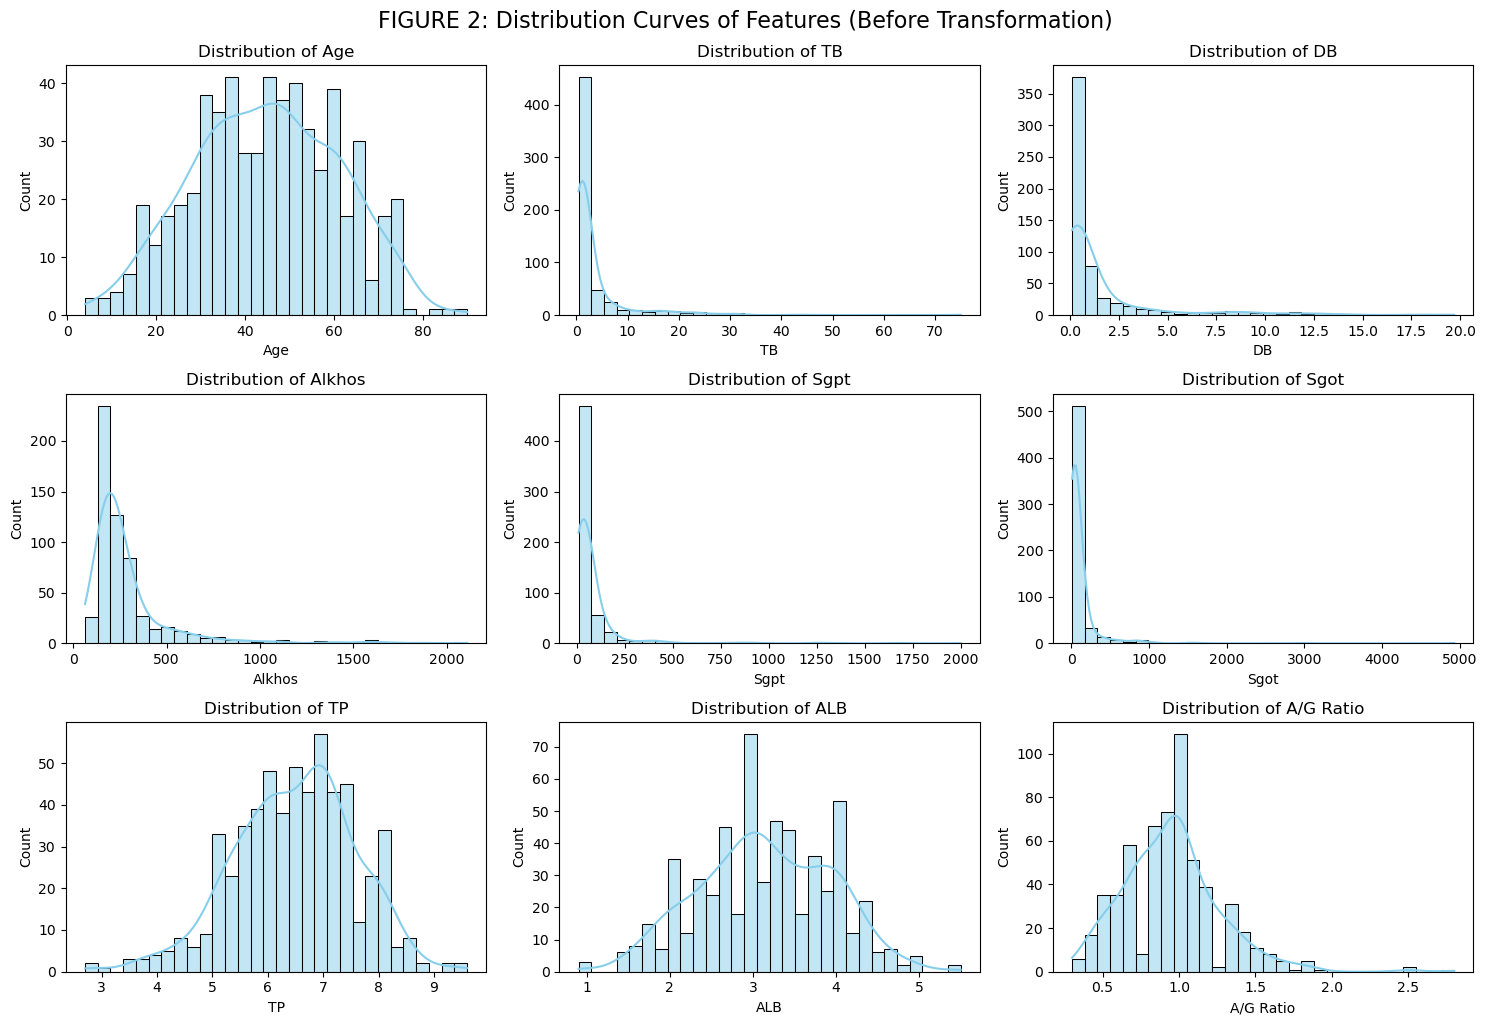

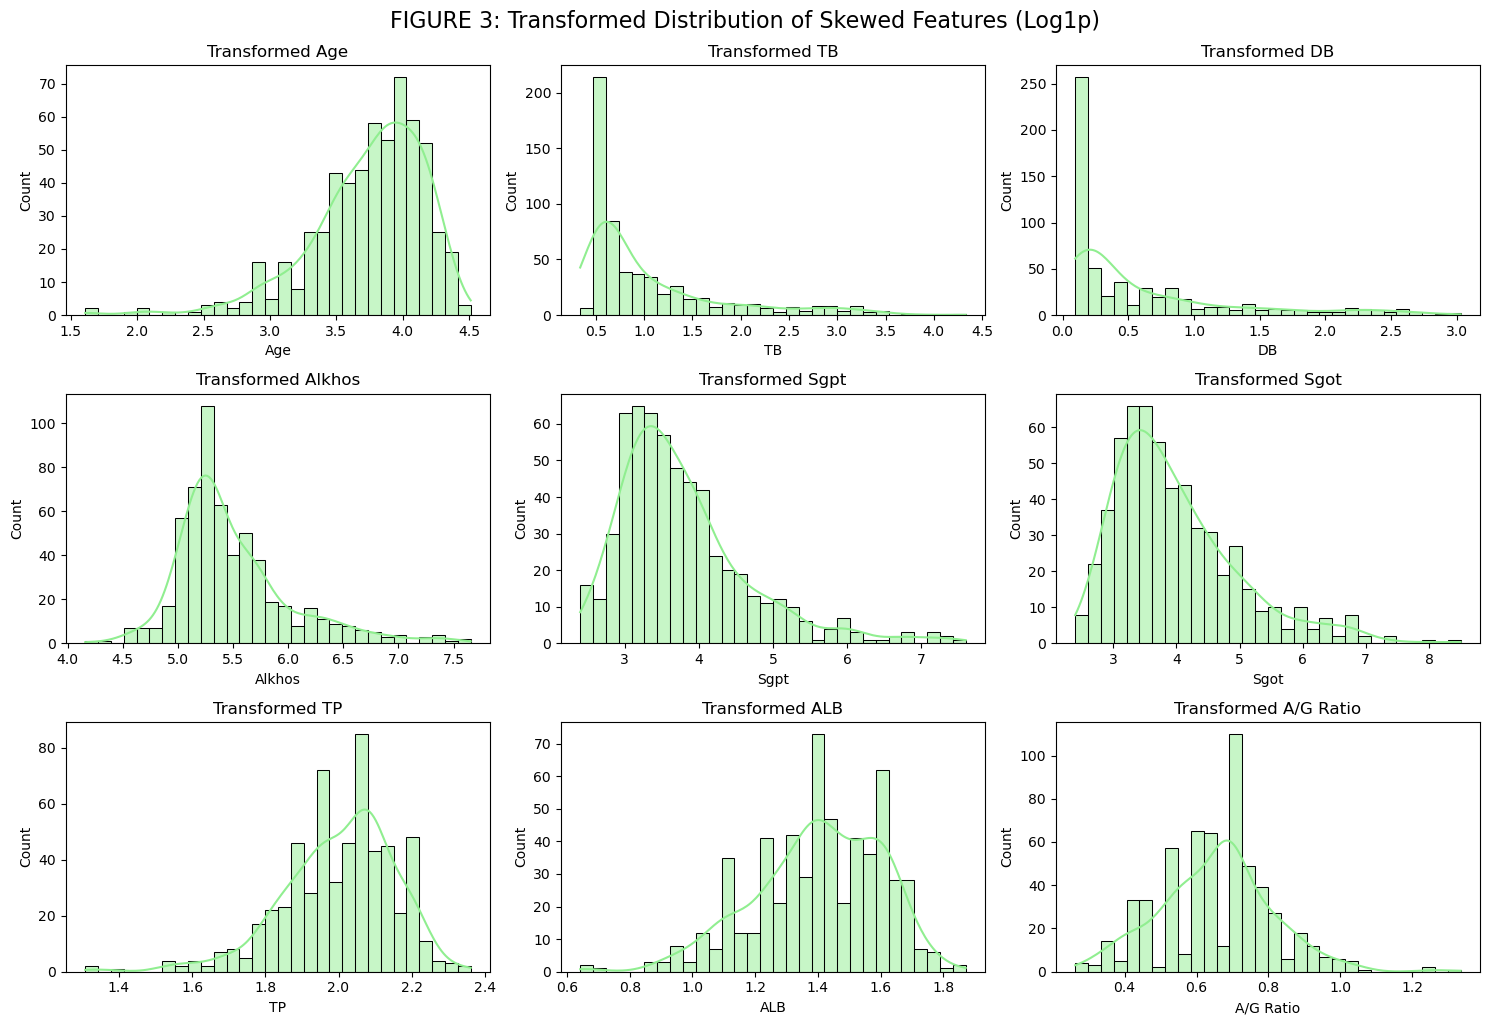

Before Balancing:
 Selector
0    416
1    167
Name: count, dtype: int64
After Balancing:
 Selector
1    416
0    416
Name: count, dtype: int64


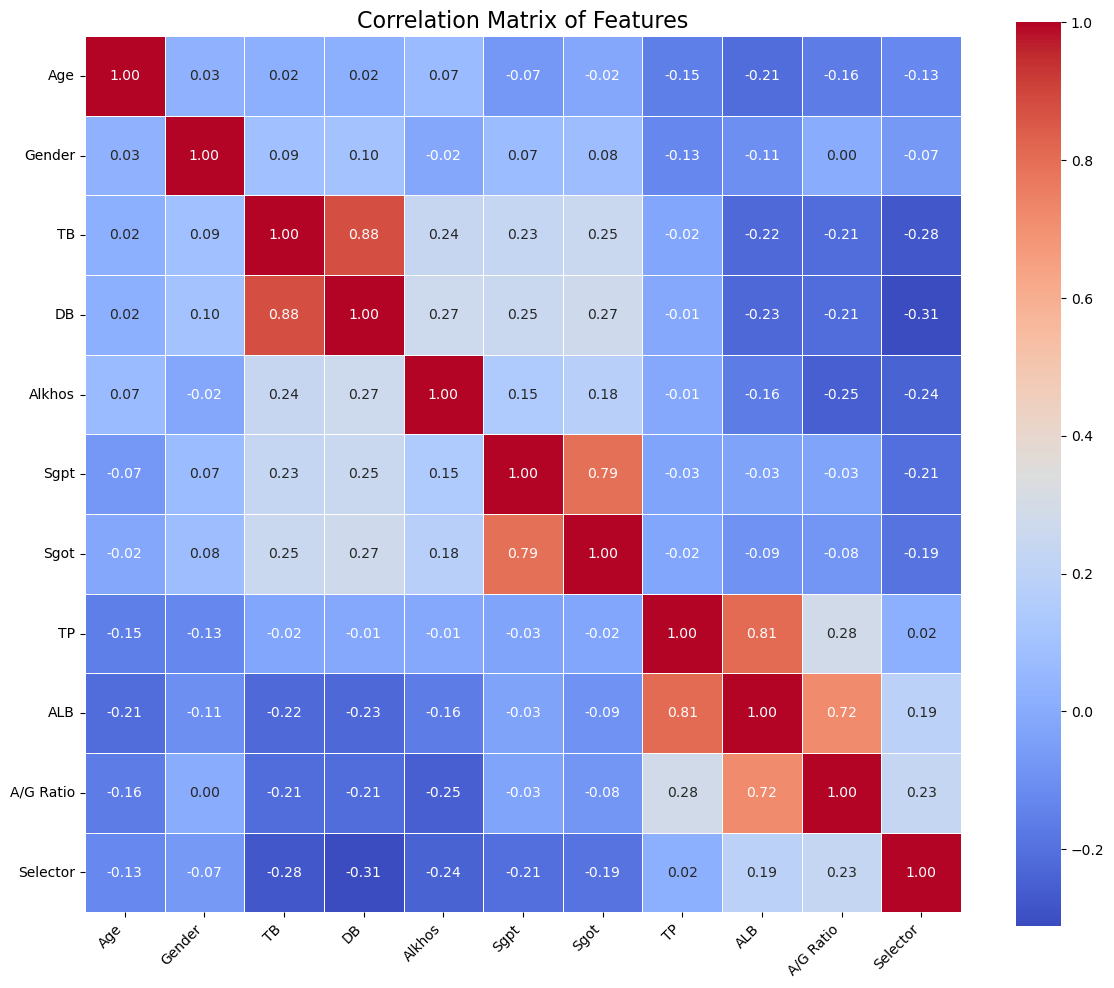


Correlation Matrix Values:
                 Age    Gender        TB        DB    Alkhos      Sgpt  \
Age        1.000000  0.030028  0.018456  0.017380  0.066742 -0.073249   
Gender     0.030028  1.000000  0.090453  0.100393 -0.017769  0.069747   
TB         0.018456  0.090453  1.000000  0.880483  0.236893  0.231932   
DB         0.017380  0.100393  0.880483  1.000000  0.267551  0.252723   
Alkhos     0.066742 -0.017769  0.236893  0.267551  1.000000  0.146869   
Sgpt      -0.073249  0.069747  0.231932  0.252723  0.146869  1.000000   
Sgot      -0.016541  0.075847  0.254354  0.274607  0.177585  0.793526   
TP        -0.153009 -0.127152 -0.020517 -0.013934 -0.013803 -0.025878   
ALB       -0.209788 -0.105834 -0.219652 -0.227643 -0.164892 -0.034597   
A/G Ratio -0.163079  0.004101 -0.213571 -0.213459 -0.252690 -0.025706   
Selector  -0.125802 -0.066617 -0.278784 -0.311483 -0.239861 -0.208294   

               Sgot        TP       ALB  A/G Ratio  Selector  
Age       -0.016541 -0.153009 -

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Performance of Traditional ML Models without Feature Selection:
                          Model  Accuracy  F1 Score  Precision    Recall  \
0           Logistic Regression  0.742515  0.770053   0.692308  0.867470   
1                 Decision Tree  0.844311  0.858696   0.782178  0.951807   
2           K-Nearest Neighbors  0.712575  0.741935   0.669903  0.831325   
3  Linear Discriminant Analysis  0.754491  0.787565   0.690909  0.915663   
4        Multi-Layer Perceptron  0.766467  0.782123   0.729167  0.843373   

    ROC AUC  
0  0.784997  
1  0.844951  
2  0.852912  
3  0.776965  
4  0.844951  

Selected Features using Random Forest (Feature Importance):
['Alkhos', 'Sgot', 'Sgpt', 'Age', 'TB', 'DB', 'TP']

Selected Features using RFE (with Extra Trees Classifier):
['Age', 'TB', 'DB', 'Alkhos', 'Sgpt', 'Sgot', 'ALB']

Common Selected Features from Random Forest and RFE:
['TB', 'Sgpt', 'Age', 'Alkhos', 'DB', 'Sgot']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Performance of Models with Common Selected Features:
                          Model  Accuracy  F1 Score  Precision    Recall  \
0           Logistic Regression  0.682635  0.722513   0.638889  0.831325   
1                 Decision Tree  0.820359  0.840426   0.752381  0.951807   
2           K-Nearest Neighbors  0.748503  0.769231   0.707071  0.843373   
3  Linear Discriminant Analysis  0.712575  0.757576   0.652174  0.903614   
4        Multi-Layer Perceptron  0.760479  0.784946   0.708738  0.879518   

    ROC AUC  
0  0.736804  
1  0.821142  
2  0.841724  
3  0.723752  
4  0.774957  


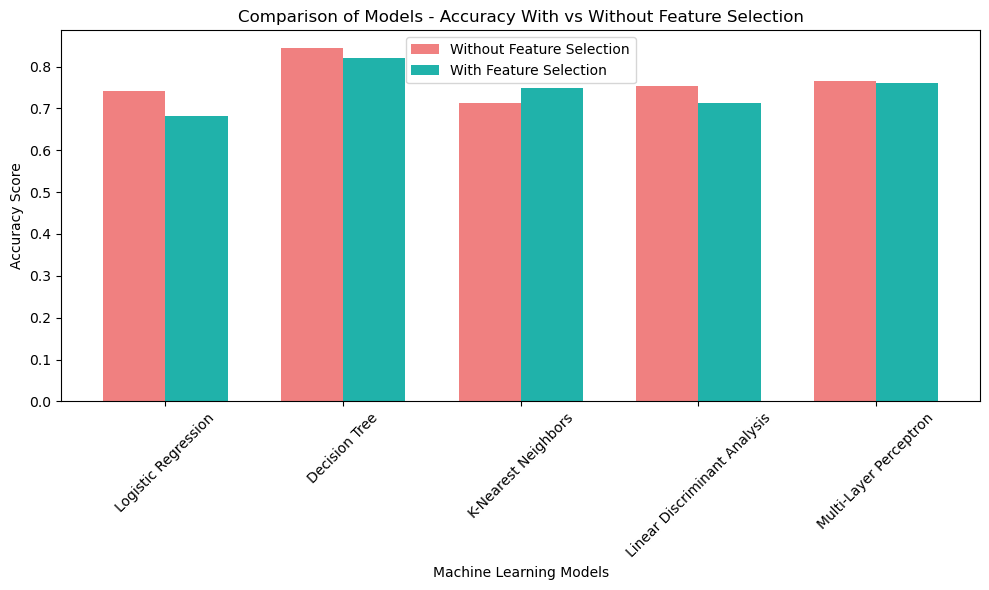

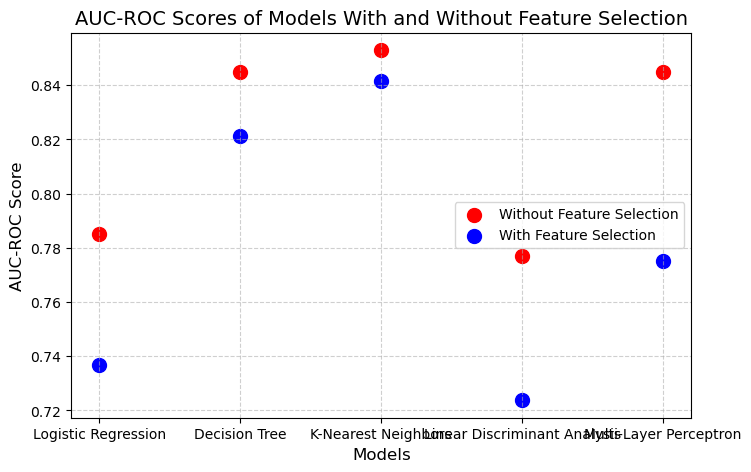

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import RFE

# Load dataset
df = pd.read_csv("Indian Liver Patient Dataset.csv")

# Handle missing values
df["A/G Ratio"].fillna(df["A/G Ratio"].mean(), inplace=True)

# Encode Gender (Male -> 1, Female -> 0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

df_skewed_original = df[["Age", "TB", "DB", "Alkhos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]].copy()

# === FIGURE 2: Distribution Curves Before Transformation ===
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_skewed_original.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_skewed_original[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.suptitle("FIGURE 2: Distribution Curves of Features (Before Transformation)", fontsize=16, y=1.02)
plt.show()

# Apply log1p transformation and store it in a new variable
df_transformed = df[["Age", "TB", "DB", "Alkhos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]].apply(np.log1p)

# === FIGURE 3: Distribution Curves After Log1p Transformation ===
plt.figure(figsize=(15, 10))
for i, col in enumerate(df[["Age", "TB", "DB", "Alkhos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]].columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_transformed[col], kde=True, bins=30, color='lightgreen')
    plt.title(f"Transformed {col}")
plt.tight_layout()
plt.suptitle("FIGURE 3: Transformed Distribution of Skewed Features (Log1p)", fontsize=16, y=1.02)
plt.show()

# Normalize numerical features
scaler = StandardScaler()
scaled_columns = ["Age", "TB", "DB", "Alkhos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Adjust target labels (1 → 0, 2 → 1 for compatibility)
df["Selector"] = df["Selector"].replace({1: 0, 2: 1})

print("Before Balancing:\n", df["Selector"].value_counts())

# Manual oversampling
df_majority = df[df["Selector"] == 0]
df_minority = df[df["Selector"] == 1]
df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=42)

# Combine
df_balanced = pd.concat([df_majority, df_minority_oversampled]).sample(frac=1, random_state=42).reset_index(drop=True)

print("After Balancing:\n", df_balanced["Selector"].value_counts())

# === Correlation Matrix ===
plt.figure(figsize=(12, 10))
corr_matrix = df_balanced.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True, linewidths=0.5)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\nCorrelation Matrix Values:\n", corr_matrix)

# Split dataset
X = df_balanced.drop(columns=["Selector"])
y = df_balanced["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Size:", X_train.shape, "Testing Size:", X_test.shape)

# Single models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Multi-Layer Perceptron": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    
}

#results = []

#for name, model in models.items():
#    model.fit(X_train, y_train)
#    y_pred = model.predict(X_test)
    
#    accuracy = accuracy_score(y_test, y_pred)
#    f1 = f1_score(y_test, y_pred)
#    precision = precision_score(y_test, y_pred)
#    recall = recall_score(y_test, y_pred)
#    roc_auc = roc_auc_score(y_test, y_pred)
    
#    results.append([name, accuracy, f1, precision, recall, roc_auc])

#results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"])
#print("\nPerformance of Traditional ML Models without Feature Selection:")
#print(results_df)
#print("\nSingle Model Results:", results)


results_without_fs = {}
roc_auc_without_fs = {}
results = []

auc_without_fs = []
auc_with_fs = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results_without_fs[name] = accuracy
    roc_auc_without_fs[name] = roc_auc
    auc_without_fs.append(roc_auc_score(y_test, y_proba))


    results.append([name, accuracy, f1, precision, recall, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"])
print("\nPerformance of Traditional ML Models without Feature Selection:")
print(results_df)


#feature selection
# 1. Feature Selection using Random Forest (Feature Importance)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create Feature Importance DataFrame
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select Top 7 features
top_rf_features = rf_importances['Feature'].head(7).tolist()

print("\nSelected Features using Random Forest (Feature Importance):")
print(top_rf_features)

# 2. Feature Selection using RFE with Extra Trees Classifier

# Train Extra Trees
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=etc, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Select features based on RFE
rfe_selected_features = X_train.columns[rfe.support_].tolist()

print("\nSelected Features using RFE (with Extra Trees Classifier):")
print(rfe_selected_features)

# 3. (Optional) Create new datasets based on selected features

# Using Random Forest selected features
X_train_rf = X_train[top_rf_features]
X_test_rf = X_test[top_rf_features]

# Using RFE selected features
X_train_rfe = X_train[rfe_selected_features]
X_test_rfe = X_test[rfe_selected_features]

# Continuing from previous selections:

# top_rf_features -> selected by Random Forest
# rfe_selected_features -> selected by RFE (Extra Trees)

# Find common features
common_selected_features = list(set(top_rf_features).intersection(set(rfe_selected_features)))

print("\nCommon Selected Features from Random Forest and RFE:")
print(common_selected_features)


# Prepare X_train and X_test with only common selected features
X_train_common = X_train[common_selected_features]
X_test_common = X_test[common_selected_features]

# Store results
results_common = []
results_with_fs={}
roc_auc_with_fs = {}

for name, model in models.items():
    model.fit(X_train_common, y_train)
    y_pred = model.predict(X_test_common)
    y_proba = model.predict_proba(X_test_common)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_common)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results_with_fs[name] = accuracy
    roc_auc_with_fs[name] = roc_auc
    auc_with_fs.append(roc_auc_score(y_test, y_proba))

    model_names.append(name)

    
    results_common.append([name, accuracy, f1, precision, recall, roc_auc])



# Create DataFrame for performance
results_common_df = pd.DataFrame(results_common, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"])

print("\nPerformance of Models with Common Selected Features:")
print(results_common_df)

#plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, list(results_without_fs.values()), bar_width, label="Without Feature Selection", color='lightcoral')
plt.bar(index + bar_width, list(results_with_fs.values()), bar_width, label="With Feature Selection", color='lightseagreen')

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Models - Accuracy With vs Without Feature Selection')
plt.xticks(index + bar_width / 2, list(models.keys()), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# === Scatter plot for AUC-ROC comparison ===

#x = np.arange(len(models_list))

# Red and blue dots
#plt.scatter(x, list(roc_auc_without_fs.values()), color='red', label='Without feature selection', s=100)
#plt.scatter(x, list(roc_auc_with_fs.values()), color='blue', label='With feature selection', s=100)

# Axes and title
#plt.xticks(x, models_list)
#plt.xlabel("Models")
#plt.ylabel("AUC_ROC Score")
#plt.title("AUC_ROC scores of single ML models with and without feature selection")
#plt.ylim(0.66, 0.83)
#plt.legend()
#plt.grid(True, linestyle='--', alpha=0.5)
#plt.tight_layout()
#plt.show()
#plt.figure(figsize=(8, 6))

#models_list = list(models.keys())
#plt.scatter(models_list, list(roc_auc_without_fs.values()), color="red", label="Without Feature Selection", s=100)
#plt.scatter(models_list, list(roc_auc_with_fs.values()), color="blue", label="With Feature Selection", s=100)

#plt.xlabel("Models", fontsize=12)
#plt.ylabel("AUC-ROC Score", fontsize=12)
#plt.title("AUC-ROC Scores of Models With and Without Feature Selection", fontsize=14)
#plt.legend()
#plt.grid(True, linestyle="--", alpha=0.6)
#plt.tight_layout()
#plt.show()


# Plotting

plt.figure(figsize=(8, 5))
plt.scatter(model_names, auc_without_fs, color="red", label="Without Feature Selection", s=100)
plt.scatter(model_names, auc_with_fs, color="blue", label="With Feature Selection", s=100)

plt.xlabel("Models", fontsize=12)
plt.ylabel("AUC-ROC Score", fontsize=12)
plt.title("AUC-ROC Scores of Models With and Without Feature Selection", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [3]:
from xgboost import XGBClassifier


# Define the ensemble models
ensemble_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

ensemble_results_without_fs = {}
ensemble_roc_auc_without_fs = {}
ensemble_results = []

ensemble_auc_without_fs = []
#ensemble_auc_with_fs = []
ensemble_model_names = []



#ensemble_results = {}
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    ensemble_results_without_fs[name] = accuracy
    ensemble_roc_auc_without_fs[name] = roc_auc
    ensemble_auc_without_fs.append(roc_auc_score(y_test, y_proba))

    ensemble_model_names.append(name)

    ensemble_results.append([name, accuracy, f1, precision, recall, roc_auc])

ensemble_results_df = pd.DataFrame(ensemble_results, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"])
print("\nPerformance of Traditional ML Models without Feature Selection:")
print(ensemble_results_df)

    #ensemble_results[name] = accuracy_score(y_test, y_pred)

print("\nEnsemble Model Results without Feature Selection:", ensemble_results_without_fs[name])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance of Traditional ML Models without Feature Selection:
               Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0      Random Forest  0.850299  0.860335   0.802083  0.927711  0.965361
1        Extra Trees  0.910180  0.912281   0.886364  0.939759  0.972390
2  Gradient Boosting  0.814371  0.826816   0.770833  0.891566  0.893718
3           AdaBoost  0.754491  0.765714   0.728261  0.807229  0.826018
4            XGBoost  0.862275  0.871508   0.812500  0.939759  0.955250

Ensemble Model Results without Feature Selection: 0.8622754491017964


In [4]:
ensemble_results_with_fs = []
ensemble_roc_auc_with_fs = {}
ensemble_results_with_fs = []
ensem_result_names={}

ensemble_auc_with_fs = []
#ensemble_auc_with_fs = []
ensemble_model_names_with_fs = []



#ensemble_results = {}
for name, model in ensemble_models.items():
    model.fit(X_train_common, y_train)
    y_pred = model.predict(X_test_common)
    y_proba = model.predict_proba(X_test_common)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    ensem_result_names[name] = accuracy
    ensemble_roc_auc_with_fs[name] = roc_auc
    ensemble_auc_with_fs.append(roc_auc_score(y_test, y_proba))

    ensemble_model_names_with_fs.append(name)

    ensemble_results_with_fs.append([name, accuracy, f1, precision, recall, roc_auc])

ensemble_results_df = pd.DataFrame(ensemble_results_with_fs, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"])
print("\nPerformance of Traditional ML Models with Feature Selection:")
print(ensemble_results_df)

    #ensemble_results[name] = accuracy_score(y_test, y_pred)

print("\nEnsemble Model Results with Feature Selection:", ensem_result_names[name])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance of Traditional ML Models with Feature Selection:
               Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0      Random Forest  0.862275  0.870056   0.819149  0.927711  0.962349
1        Extra Trees  0.916168  0.917647   0.896552  0.939759  0.973250
2  Gradient Boosting  0.802395  0.811429   0.771739  0.855422  0.876219
3           AdaBoost  0.760479  0.777778   0.721649  0.843373  0.838784
4            XGBoost  0.874251  0.880000   0.836957  0.927711  0.934596

Ensemble Model Results with Feature Selection: 0.874251497005988


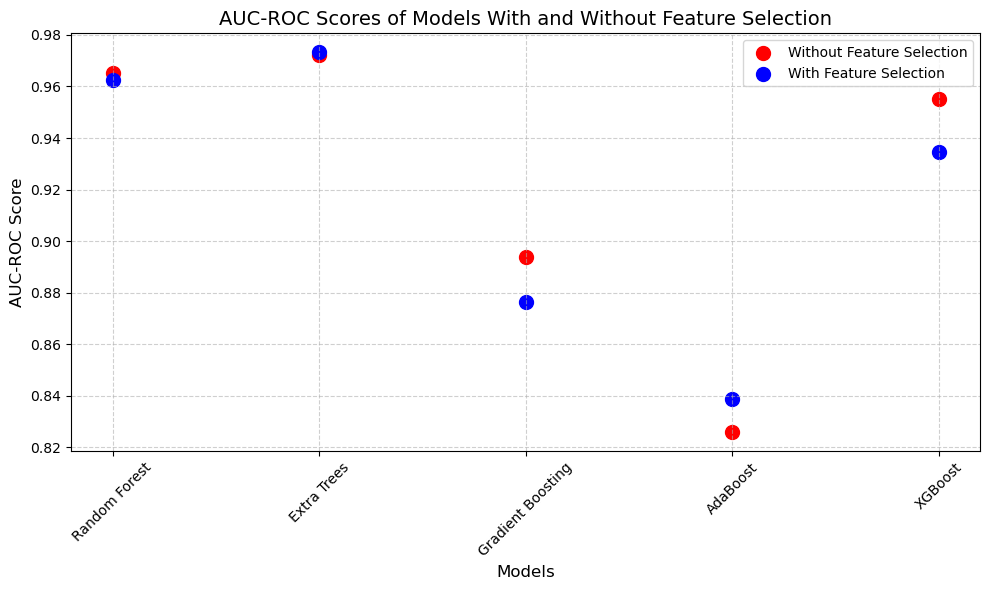

In [5]:
#ensemble_model_names = ["Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "AdaBoost"]

plt.figure(figsize=(10, 6))
plt.scatter(ensemble_model_names, ensemble_auc_without_fs, color="red", label="Without Feature Selection", s=100)
plt.scatter(ensemble_model_names, ensemble_auc_with_fs, color="blue", label="With Feature Selection", s=100)

plt.xlabel("Models", fontsize=12)
plt.ylabel("AUC-ROC Score", fontsize=12)
plt.title("AUC-ROC Scores of Models With and Without Feature Selection", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import StackingClassifier

# Define your base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-models list (one by one we will try each)
meta_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# To store results
stacking_results = []
stacking_results_score={}

for meta_name, meta_model in meta_models.items():
    # Build stacking classifier
    stacking_clf = StackingClassifier(
        estimators=base_learners,
        final_estimator=meta_model,
        cv=5,  # or whatever CV you want
        n_jobs=-1,
        passthrough=False
    )
    
    stacking_clf.fit(X_train, y_train)
    y_pred = stacking_clf.predict(X_test)
    y_proba = stacking_clf.predict_proba(X_test)[:,1]

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    roc_auc = roc_auc_score(y_test, y_proba)

    stacking_results_score[name] = accuracy

    stacking_results.append([
        meta_name, accuracy, precision, recall, specificity, f1, roc_auc
    ])

# Create DataFrame
stacking_results_df = pd.DataFrame(
    stacking_results, 
    columns=["Meta-Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC ROC"]
)

print(stacking_results_df)
print("\nStacking Model Results without feature selection:", stacking_results_score[name])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:36:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


          Meta-Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0      Random Forest  0.958084   0.987179  0.927711     0.988095  0.956522   
1        Extra Trees  0.964072   1.000000  0.927711     1.000000  0.962500   
2  Gradient Boosting  0.940120   0.950617  0.927711     0.952381  0.939024   
3           AdaBoost  0.916168   0.905882  0.927711     0.904762  0.916667   
4            XGBoost  0.928144   0.927711  0.927711     0.928571  0.927711   

    AUC ROC  
0  0.973035  
1  0.971816  
2  0.971170  
3  0.971744  
4  0.962134  

Stacking Model Results without feature selection: 0.9281437125748503


In [7]:
from sklearn.ensemble import StackingClassifier

# Define your base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-models list (one by one we will try each)
meta_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# To store results
stacking_results = []
stacking_results_score_with_fs={}

for meta_name, meta_model in meta_models.items():
    # Build stacking classifier
    stacking_clf = StackingClassifier(
        estimators=base_learners,
        final_estimator=meta_model,
        cv=5,  # or whatever CV you want
        n_jobs=-1,
        passthrough=False
    )
    
    stacking_clf.fit(X_train_common, y_train)
    y_pred = stacking_clf.predict(X_test_common)
    y_proba = stacking_clf.predict_proba(X_test_common)[:,1]

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    roc_auc = roc_auc_score(y_test, y_proba)

    stacking_results_score_with_fs[name] = accuracy
    
    stacking_results.append([
        meta_name, accuracy, precision, recall, specificity, f1, roc_auc
    ])

# Create DataFrame
stacking_results_df = pd.DataFrame(
    stacking_results, 
    columns=["Meta-Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC ROC"]
)

print(stacking_results_df)
print("\nStacking Model Results with feature selection:", stacking_results_score_with_fs[name])



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:39:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


          Meta-Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0      Random Forest  0.928144   0.927711  0.927711     0.928571  0.927711   
1        Extra Trees  0.952096   0.974684  0.927711     0.976190  0.950617   
2  Gradient Boosting  0.952096   0.974684  0.927711     0.976190  0.950617   
3           AdaBoost  0.934132   0.928571  0.939759     0.928571  0.934132   
4            XGBoost  0.940120   0.950617  0.927711     0.952381  0.939024   

    AUC ROC  
0  0.967298  
1  0.978772  
2  0.968876  
3  0.976477  
4  0.966294  

Stacking Model Results with feature selection: 0.9401197604790419


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Results without feature selection (your earlier results)
ensemble_results_without_fs = {
    "Random Forest": 0.958084 ,
    "Extra Trees":0.964072,
    "Gradient Boosting":  0.940120,
    "AdaBoost": 0.916168,
    "XGBoost": 0.928144 
}

# Results with feature selection (from your table image)
ensemble_results_with_fs = {
    "Random Forest": 0.952096 ,
    "Extra Trees":0.934132,
    "Gradient Boosting": 0.946108,
    "AdaBoost": 0.940120,
    "XGBoost": 0.904192
}

# Create DataFrame
comparison_df = pd.DataFrame({
    "Model": list(ensemble_results_without_fs.keys()),
    "Accuracy Without FS": list(ensemble_results_without_fs.values()),
    "Accuracy With FS": list(ensemble_results_with_fs.values())
})

# Find which is better for each model
comparison_df["Better Approach"] = comparison_df.apply(
    lambda row: "Without FS" if row["Accuracy Without FS"] > row["Accuracy With FS"] else "With FS",
    axis=1
)

# Print the comparison table
print("\nComparison of Ensemble Models:")
print(comparison_df)

# Count how many times "With FS" is better and how many times "Without FS" is better
better_counts = comparison_df["Better Approach"].value_counts()

print("\nBetter Approach Summary:")
print(better_counts)

# Final Decision
if better_counts.get("With FS", 0) > better_counts.get("Without FS", 0):
    print("\n✅ Overall, **Feature Selection improves the model performance**.")
elif better_counts.get("Without FS", 0) > better_counts.get("With FS", 0):
    print("\n✅ Overall, **Without Feature Selection gives better performance**.")
else:
    print("\n✅ Overall, **Both approaches perform equally**.")


Comparison of Ensemble Models:
               Model  Accuracy Without FS  Accuracy With FS Better Approach
0      Random Forest             0.958084          0.952096      Without FS
1        Extra Trees             0.964072          0.934132      Without FS
2  Gradient Boosting             0.940120          0.946108         With FS
3           AdaBoost             0.916168          0.940120         With FS
4            XGBoost             0.928144          0.904192      Without FS

Better Approach Summary:
Better Approach
Without FS    3
With FS       2
Name: count, dtype: int64

✅ Overall, **Without Feature Selection gives better performance**.


Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best Gradient Boosting Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'learning_rate': 0.2}
Best Extra Trees Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


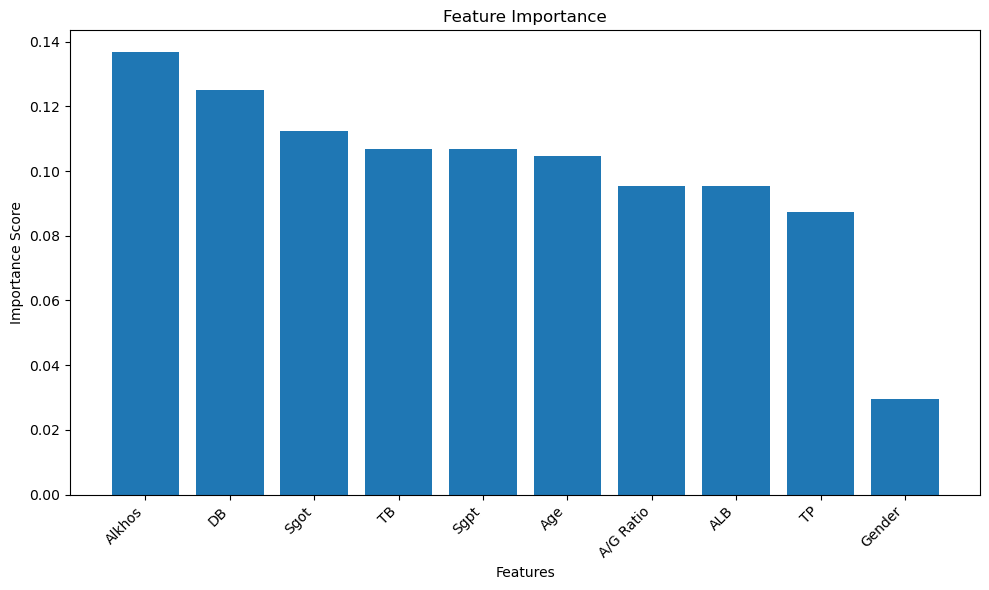

Alkhos: 0.1366
DB: 0.1250
Sgot: 0.1125
TB: 0.1070
Sgpt: 0.1068
Age: 0.1046
A/G Ratio: 0.0955
ALB: 0.0952
TP: 0.0872
Gender: 0.0296
                Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0  Optimized Stacking   0.94012   0.962025  0.915663     0.964286  0.938272   

    AUC ROC  
0  0.980063  


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hyperparameter tuning
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
gb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
et_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=5, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
gb_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_params, n_iter=10, cv=5, n_jobs=-1, random_state=42)
gb_search.fit(X_train, y_train)
et_search = RandomizedSearchCV(ExtraTreesClassifier(random_state=42), et_params, n_iter=10, cv=5, n_jobs=-1, random_state=42)
et_search.fit(X_train, y_train)

best_rf_params = rf_search.best_params_
best_gb_params = gb_search.best_params_
best_et_params = et_search.best_params_

print("Best Random Forest Params:", best_rf_params)
print("Best Gradient Boosting Params:", best_gb_params)
print("Best Extra Trees Params:", best_et_params)

# Feature importance
feature_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
feature_model.fit(X_train, y_train)

importances = feature_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


# Dropping 'Gender'
X_train_selected = X_train.drop(columns=["Gender"])
X_test_selected = X_test.drop(columns=["Gender"])

# Define optimized base models
optimized_base_models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(**best_rf_params, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(**best_gb_params, random_state=42)),
]

# Meta-model
optimized_meta_model = ExtraTreesClassifier(**best_et_params, random_state=42)

# Stacking model
optimized_stacking_model = StackingClassifier(
    estimators=optimized_base_models,
    final_estimator=optimized_meta_model,
    passthrough=True,
    n_jobs=-1
)

# Train
optimized_stacking_model.fit(X_train_selected, y_train)

# Predict
y_pred_stack = optimized_stacking_model.predict(X_test_selected)
y_proba_stack = optimized_stacking_model.predict_proba(X_test_selected)[:, 1]

# Metrics Calculation
stacking_accuracy = accuracy_score(y_test, y_pred_stack)
stacking_precision = precision_score(y_test, y_pred_stack)
stacking_recall = recall_score(y_test, y_pred_stack)
stacking_specificity = recall_score(y_test, y_pred_stack, pos_label=0)
stacking_f1 = f1_score(y_test, y_pred_stack)
stacking_auc = roc_auc_score(y_test, y_proba_stack)

# Results as a table
optimized_stacking_results = pd.DataFrame([[
    "Optimized Stacking",
    stacking_accuracy,
    stacking_precision,
    stacking_recall,
    stacking_specificity,
    stacking_f1,
    stacking_auc
]], columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC ROC"])

# Print the results
print(optimized_stacking_results)
